# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 42.7 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 81.4 MB/s eta 0:00:01


**Important: Restart the Kernel at this moment**

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset - used train_test_split() to split data
Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [13]:
from sklearn.model_selection import train_test_split
# Define transforms
  
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Create training set, validation set and define training, Val dataloader

full_train_ds = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform = transform
)

# Split training dataset into train and validation using train_test_split
train, val = train_test_split(range(len(full_train_ds)), test_size = 0.2, random_state = 42, stratify=full_train_ds.targets)

train_ds = torch.utils.data.Subset(full_train_ds, train)
val_ds = torch.utils.data.Subset(full_train_ds, val)

#Train dataloader
train_loader = torch.utils.data.DataLoader(
    train_ds,
    batch_size = 64,
    shuffle = True
)

#val dataloader
val_loader = torch.utils.data.DataLoader(
    val_ds,
    batch_size = 64,
    shuffle = False
)



# Create test set and define test dataloader

test_ds = torchvision.datasets.MNIST(
    root ='./data',
    train = False,
    download = True,
    transform = transform
)

test_loader = torch.utils.data.DataLoader(
    test_ds,
    batch_size = 64,
    shuffle = False

)


## Preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**- Transforms.ToTensor** - is used to convert input images to pytorch tensors , this is because neural networks in pytorch work on tensors to speed up convergence. 
**- transforms.Normalize** - normalizes the tensors by removing the mean and dividing by standard deviation to produce values between -1 and 1 this helps stabilize and accelerate training rate 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [14]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

## Dataset Sizes and shapes !!

In [15]:
# size of training and test data
print('Training data size: ', len(train_ds))
print('Test data size: ', len(test_ds))
print('Validation data size: ', len(val_ds))
print('Training dataloader size: ', len(train_loader)) # train_ds/64
print('Test dataloader size: ', len(test_loader)) # test_ds/64
print('Validation dataloader size: ', len(val_loader))

Training data size:  48000
Test data size:  10000
Validation data size:  12000
Training dataloader size:  750
Test dataloader size:  157
Validation dataloader size:  188


In [17]:
#shape of the datasets/batch
train_inputs, train_labels = next(iter(train_loader)) # gets the first batch
test_inputs, test_labels = next(iter(test_loader)) 
val_inputs, val_labels = next(iter(val_loader)) 

print("Training dataset shape: ", train_inputs.shape)
print("Test dataset shape: ", test_inputs.shape)
print("Validation set shape: ", val_inputs.shape)

Training dataset shape:  torch.Size([64, 1, 28, 28])
Test dataset shape:  torch.Size([64, 1, 28, 28])
Validation set shape:  torch.Size([64, 1, 28, 28])


0


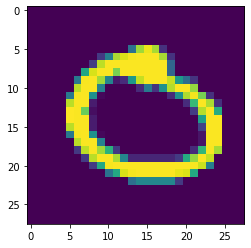

6


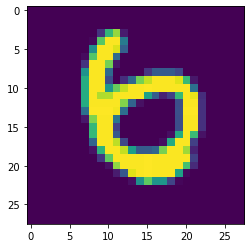

0


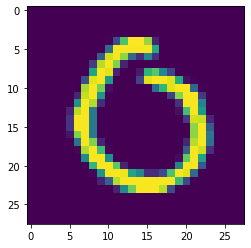

6


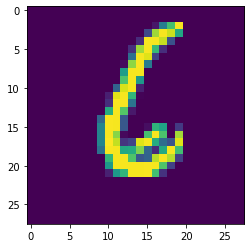

6


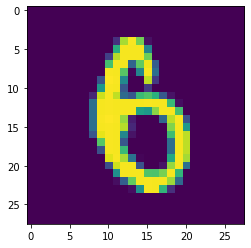

In [18]:
# Explore  training data
show5(train_loader)

7


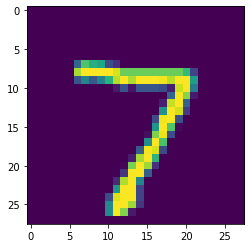

2


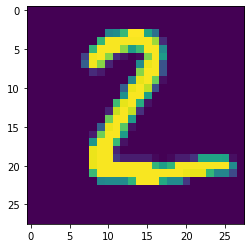

1


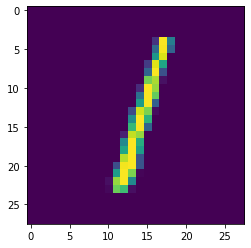

0


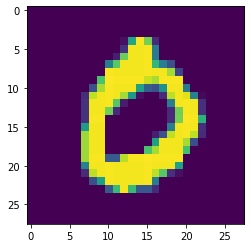

4


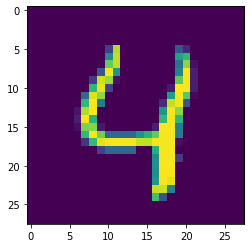

In [19]:
# explore test data
show5(test_loader)

## Build your Neural Network = Dropout layers and BatchNorm1d layers added
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [20]:
#Neural network class using the nn.Module
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet,self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 256),
            nn.BatchNorm1d(256),  #Batch Normalization layer
            nn.ReLU(),
            nn.Dropout(0.3), #30 percent dropout rate - DROPOUT Layer
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),  #Batch Normalization layer
            nn.ReLU(),
            nn.Dropout(0.3),#30 percent dropout rate - DROPOUT Layer
            nn.Linear(256,10)
        )
        
    def forward(self, x):
        x = self.model(x)
        x = F.log_softmax(x, dim =1) # log_max for numerical stability
        return x
        

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [21]:
#set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
net = MNISTNet().to(device)
criterion = nn.NLLLoss() #pairs really well with log_softmax
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Adapts learning rates per parameter

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [25]:
epochs_num = 15
# Establish a list for our history
train_loss_history = []
val_loss_history = []

for epoch in range(epochs_num):
    net.train()
    running_loss = 0.0
    train_correct = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data # data is a list of inputs and labels
        
        #pass GPU if available
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _,preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader)*100:.2f}% training loss: {running_loss/len(train_loader):.5f}')
    train_loss_history.append(running_loss/len(train_loader))    
    
    net.eval()
    val_loss = 0.0
    val_correct = 0
    
    
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()

        
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader)*100:.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))    
        

Epoch 1 training accuracy: 91.39% training loss: 0.29368
Epoch 1 validation accuracy: 96.41% validation loss: 0.12283
Epoch 2 training accuracy: 95.26% training loss: 0.15336
Epoch 2 validation accuracy: 96.94% validation loss: 0.09591
Epoch 3 training accuracy: 96.12% training loss: 0.12067
Epoch 3 validation accuracy: 97.22% validation loss: 0.09476
Epoch 4 training accuracy: 96.81% training loss: 0.10140
Epoch 4 validation accuracy: 97.66% validation loss: 0.07307
Epoch 5 training accuracy: 97.08% training loss: 0.08913
Epoch 5 validation accuracy: 97.76% validation loss: 0.07740
Epoch 6 training accuracy: 97.35% training loss: 0.08050
Epoch 6 validation accuracy: 97.83% validation loss: 0.07258
Epoch 7 training accuracy: 97.56% training loss: 0.07519
Epoch 7 validation accuracy: 97.86% validation loss: 0.06961
Epoch 8 training accuracy: 97.84% training loss: 0.06557
Epoch 8 validation accuracy: 97.96% validation loss: 0.06905
Epoch 9 training accuracy: 97.86% training loss: 0.06401

Plot the training loss (and validation loss/accuracy, if recorded).

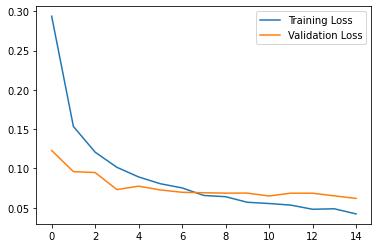

In [26]:
plt.plot(train_loss_history, label ="Training Loss")
plt.plot(val_loss_history, label ="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [27]:
correct_preds = 0
total_preds = 0

for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.to(device), labels.to(device)
        
    outputs = net(inputs)
    _, preds = torch.max(outputs.data, 1)
    total_preds += labels.size(0)
    correct_preds += (preds == labels).sum().item()
    accuracy = (correct_preds / total_preds) * 100
    
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 98.05%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

### We can improve accuracy by using a learning rate scheduler that reduces learning rate as the model trains, In this case we can use ReduceLROnPlateau to decrease learning rate when validation loss plateaus 

In [28]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor = 0.1, patience = 5, verbose = True)

In [29]:
epochs_num = 15
# Establish a list for our history
train_loss_history = []
val_loss_history = []

for epoch in range(epochs_num):
    net.train()
    running_loss = 0.0
    train_correct = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data # data is a list of inputs and labels
        
        #pass GPU if available
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _,preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        running_loss += loss.item()
    
    
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader)*100:.2f}% training loss: {running_loss/len(train_loader):.5f}')
    train_loss_history.append(running_loss/len(train_loader))  
    
    
    net.eval()
    val_loss = 0.0
    val_correct = 0
    
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()

        
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader)*100:.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))    
    
    # add scheduler
    scheduler.step(val_loss/len(val_loader))

Epoch 1 training accuracy: 98.54% training loss: 0.04420
Epoch 1 validation accuracy: 98.17% validation loss: 0.06793
Epoch 2 training accuracy: 98.65% training loss: 0.04106
Epoch 2 validation accuracy: 98.21% validation loss: 0.06753
Epoch 3 training accuracy: 98.65% training loss: 0.03827
Epoch 3 validation accuracy: 98.24% validation loss: 0.06588
Epoch 4 training accuracy: 98.77% training loss: 0.03523
Epoch 4 validation accuracy: 98.25% validation loss: 0.06427
Epoch 5 training accuracy: 98.84% training loss: 0.03584
Epoch 5 validation accuracy: 98.23% validation loss: 0.06730
Epoch 6 training accuracy: 98.79% training loss: 0.03593
Epoch 6 validation accuracy: 98.25% validation loss: 0.06488
Epoch 7 training accuracy: 98.91% training loss: 0.03216
Epoch 7 validation accuracy: 98.25% validation loss: 0.06802
Epoch 8 training accuracy: 98.88% training loss: 0.03285
Epoch 8 validation accuracy: 98.19% validation loss: 0.07324
Epoch 9 training accuracy: 98.89% training loss: 0.03240

## Final Accuracy after editing hyparameters


In [30]:
correct_preds = 0
total_preds = 0

for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.to(device), labels.to(device)
        
    outputs = net(inputs)
    _, preds = torch.max(outputs.data, 1)
    total_preds += labels.size(0)
    correct_preds += (preds == labels).sum().item()
    accuracy = (correct_preds / total_preds) * 100
    
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 98.38%


## Saving your model
Using `torch.save`, save your model for future loading.

In [31]:
torch.save(net.state_dict(), "saved_model.pth")